# Flower Recognition

## Load Packages

In [39]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import torchvision
import torchvision.transforms as transforms
import visdom

## Set Visualization

In [40]:
'''
    For Visualizing Loss Function Graph
'''
vis = visdom.Visdom()
vis.close(env='main')

Setting up a new session...


''

In [41]:
'''
    Args:
        value_plot: type of graph
        value: loss value
        num: each epochs
'''
def value_tracker(value_plot, value, num):
    vis.line(X=num, Y=value, win=value_plot, update='append') # update append => can tracking changes of loss

## Set Device

In [42]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

torch.manual_seed(777)
if device == 'cuda':
    torch.cuda.manual_seed(777)
device

'cuda'

## Load Dataset

### Get Images and Set Transform

In [43]:
from torchvision.datasets import ImageFolder

root = 'flowers/'

transform = transforms.Compose([
    transforms.Resize((224, 224)), # one of data augmentation
    transforms.ToTensor() # numpy image to tensor
])

dataset = ImageFolder(root, transform=transform)

### Train and Test Split

In [44]:
total_cnt = len(dataset)
print('total_cnt : ', total_cnt)

# 8 : 2
train_cnt = (int) (0.8 * total_cnt)
print('train_cnt : ', train_cnt)

# split
train_dataset, test_dataset = torch.utils.data.random_split(dataset, (train_cnt, total_cnt - train_cnt))

total_cnt :  4317
train_cnt :  3453


### Dataset to Loader

In [45]:
# drop_last => drop last batch if it is not divided properly
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=16, shuffle=True, drop_last=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=16, shuffle=True, drop_last=True)

### Check Image

In [46]:
import matplotlib.pyplot as plt

'''
    transpose reason: change axis from torch to matplotlib
    
        torch:
            [batch_size, channel, width, height]
        matplotlib:
            [width, height, channel]
'''
def check_iamge(image):
    image = image.numpy()
    plt.imshow(np.transpose(image, (1, 2, 0))) 
    plt.show()

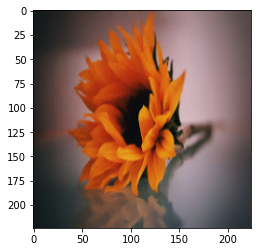

tensor(3)


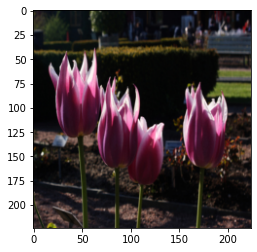

tensor(4)


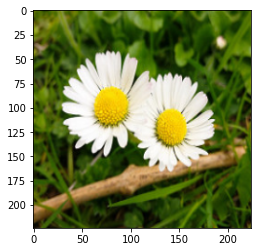

tensor(0)


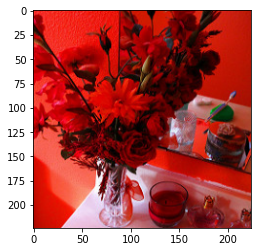

tensor(2)


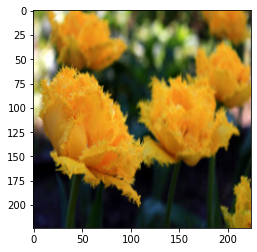

tensor(4)


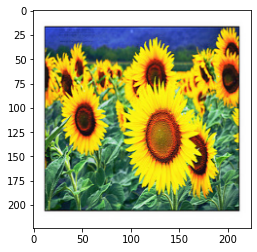

tensor(3)


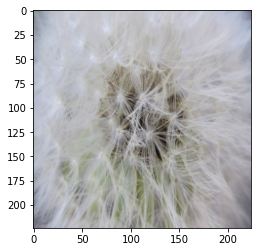

tensor(1)


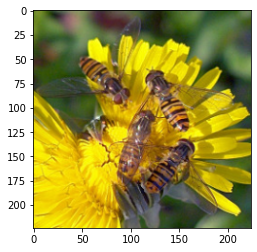

tensor(1)


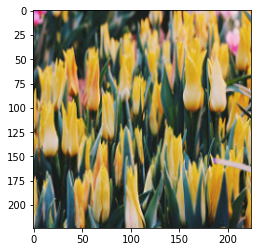

tensor(4)


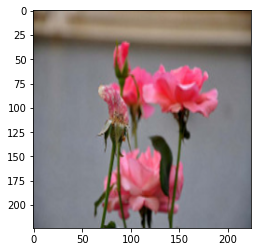

tensor(2)


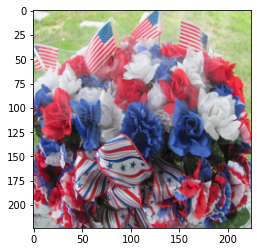

tensor(2)


In [47]:
# check 10-images
for i, (images, labels) in enumerate(train_loader):
    check_iamge(images[0])
    print(labels[0]) # index of flower folder
    if i == 10:
        break

## ResNet Architecture